In [1]:
#import the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


In [2]:
#read csv file 
insurance_df = pd.read_csv("Insurance_claims.csv")
#insurance_df.head()

In [3]:
insurance_df = insurance_df.drop(['ReferenceId','PolicyholderNumber','InsurerNotes'], axis=1)
#these are unique values which should be dropped and column about postcode and date will be dropped later

In [4]:
#we need to find those repeated values and set them into 1, others into 0(including the missing value)
mask = insurance_df['FirstPartyVehicleNumber'].duplicated()
insurance_df.loc[mask,'FirstPartyVehicleNumber'] = 1
insurance_df.loc[~mask,'FirstPartyVehicleNumber'] = 0

In [5]:
#check if there is thirdpartyvehicle, yes -> 1, no -> 0
insurance_df['ThirdPartyVehicleNumber'].fillna(0)
insurance_df['ThirdPartyVehicleNumber'] = insurance_df['ThirdPartyVehicleNumber'].apply(lambda x: 1 if x > 0 else 0)

In [6]:
insurance_df['LossDate'] = pd.to_datetime(insurance_df['LossDate'])
insurance_df['FirstPolicySubscriptionDate'] = pd.to_datetime(insurance_df['FirstPolicySubscriptionDate'])

# calculate the number of days between the two dates
insurance_df['days_between'] = insurance_df.apply(lambda row: (row['LossDate'] - row['FirstPolicySubscriptionDate']).days, axis=1)
insurance_df = insurance_df.drop(['LossDate','FirstPolicySubscriptionDate'], axis=1)


In [7]:
#check the two postcodes
def compare_digits(x, y):
    x_len = len(str(x))
    y_len = len(str(y))
    if x_len == y_len:
        if x_len == 5:
            return str(x)[:2] == str(y)[:2]
        elif x_len == 4:
            return str(x)[0] == str(y)[0]
        else:
            return False
    else:
        return False

In [8]:
#check if the loss place is in the same district of the holder's place
insurance_df['IfinSameArea'] = insurance_df.apply(lambda row: 1 if compare_digits(row['LossPostCode'], row['PolicyHolderPostCode']) else 0, axis=1)

In [9]:
insurance_df = insurance_df.drop(['LossPostCode','PolicyHolderPostCode'], axis=1)

In [10]:
#set these columns to dummies
insurance_df = pd.get_dummies(insurance_df, columns=['PolicyholderOccupation','ClaimCause','ClaimInvolvedCovers','FirstPartyVehicleType','ConnectionBetweenParties'])


In [11]:
#check the two postcodes
def jud(x):
    if x == 'TotalLoss':
        return 2
    elif x == 'Medium':
        return 1
    else:
        return 0
    

In [12]:
insurance_df['DamageImportance'] = insurance_df['DamageImportance'].fillna(0)
insurance_df['DamageImportance'] = insurance_df['DamageImportance'].apply(lambda row: jud(row))

In [13]:
mean_v_fp = insurance_df['FpVehicleAgeMonths'].mean()
insurance_df['FpVehicleAgeMonths'] = insurance_df['FpVehicleAgeMonths'].fillna(value = mean_v_fp)
mean_v_fp

113.44538982462232

In [14]:
insurance_df['LossHour'] = insurance_df['LossHour'].fillna(insurance_df['LossHour'].mean())

In [15]:
mean_v_po = insurance_df['PolicyHolderAge'].mean()
insurance_df['PolicyHolderAge'] = insurance_df['PolicyHolderAge'].fillna(mean_v_po)

In [16]:
def scaler(x,col):
    between_difference = insurance_df[col].max()-insurance_df[col].min()
    Min =insurance_df[col].min()
    x = (x-Min)/between_difference
    return x

In [17]:
col_to_scale =[4,5,8,9,10,14]
for i in col_to_scale:
    col = insurance_df.columns[i]
    insurance_df[col] = insurance_df[col].apply(lambda x: scaler(x,col))
    
insurance_df

,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,DamageImportance,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,...,ClaimInvolvedCovers_Windscreen Theft,FirstPartyVehicleType_Car,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar,ConnectionBetweenParties_SameAddress,ConnectionBetweenParties_SameBankAccount,ConnectionBetweenParties_SameEmail,ConnectionBetweenParties_SamePhone,ConnectionBetweenParties_SamePolice
0,0.0,0,0,1,0.000000,0.164634,0.25,1,0.071484,0.347826,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0.117647,0.356707,0.50,1,0.024836,0.478261,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0.470588,0.147866,0.25,0,0.015429,0.782609,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0.058824,0.091463,0.25,0,0.038749,0.478261,...,0,1,0,0,0,0,0,0,0,0
4,0.0,1,0,0,0.176471,0.173780,0.25,0,0.000185,0.521739,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,0.0,0,0,0,0.000000,0.135671,0.50,1,0.015615,0.000000,...,0,1,0,0,0,0,0,0,0,0
11526,0.0,0,0,0,0.117647,0.187500,0.50,1,0.002386,0.000000,...,0,1,0,0,0,0,0,0,0,0
11527,1.0,0,0,0,0.176471,0.217988,0.50,1,0.006496,0.000000,...,0,1,0,0,0,0,0,0,0,0
11528,0.0,0,0,0,0.294118,0.166159,0.50,1,0.001490,0.000000,...,0,1,0,0,0,0,0,0,0,0


In [2]:
import numpy as np
import pandas as pd
#import pandas_profiling

import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

import os
import tempfile

import seaborn as sns

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [127]:
insurance_df = pd.read_csv("insurance_scaled_new8.csv")

# insurance_df = insurance_df.drop(columns="Unnamed: 0")
insurance_df

,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,PolicyholderOccupation,ClaimInvolvedCovers,DamageImportance,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,...,ClaimCause_8,ClaimCause_9,ClaimCause_10,ClaimCause_11,ClaimCause_12,ClaimCause_13,ClaimCause_14,ClaimCause_15,ClaimCause_16,ClaimCause_17
0,0.0,0,0.090909,0.544118,0.0,0.25,1,0.25,1,0.071484,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,1.000000,0.544118,0.0,0.25,0,0.50,1,0.024836,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0,1.000000,0.544118,0.0,0.25,0,0.25,0,0.015429,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0.090909,0.661765,0.0,0.25,0,0.25,0,0.038749,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,0.363636,0.191176,0.0,0.25,0,0.25,0,0.000185,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,0.0,0,0.181818,0.852941,0.0,0.25,0,0.50,1,0.015615,...,0,0,0,0,0,0,0,0,0,1
11526,0.0,0,0.181818,0.852941,0.0,0.25,0,0.50,1,0.002386,...,0,0,0,0,0,0,0,0,0,1
11527,1.0,0,0.181818,0.852941,0.0,0.25,0,0.50,1,0.006496,...,0,0,0,0,0,0,0,0,0,1
11528,0.0,0,0.090909,0.852941,0.0,0.25,0,0.50,1,0.001490,...,0,0,0,0,0,0,0,0,0,1


In [128]:
# Divide fraudulent and non-fraudulent observations
df_frau = insurance_df.loc[insurance_df["Fraud"]==1]
df_nofr = insurance_df.loc[insurance_df["Fraud"]==0]
# Build X set and y set
X_frau = df_frau.drop(columns = ["Fraud"])
Y_frau = df_frau["Fraud"]
X_nofr = df_nofr.drop(columns = ["Fraud"])
Y_nofr = df_nofr["Fraud"]
print("X with fraud:", X_frau.shape)
print("X without fraud:", X_nofr.shape)
print("proportion:", X_frau.shape[0]/X_nofr.shape[0])

# Split Train & Other dataset without fraudulent observations
X_train, X_other, Y_train, Y_other = train_test_split(X_nofr, Y_nofr, test_size=0.2, random_state = 111)
print("Train:",X_train.shape)
print("Other:",X_other.shape)
# Split Vali & Test dataset without fraudulent observations
X_test_n, X_vali_n, Y_test_n, Y_vali_n = train_test_split(X_other, Y_other, test_size=0.3, random_state = 111)
print("Test_n:",X_test_n.shape)
print("Vali_n:", X_vali_n.shape)

# Split fraudulent observations equally
X_test_y, X_vali_y, Y_test_y, Y_vali_y = train_test_split(X_frau, Y_frau, test_size=0.3, random_state = 111)
print("Test_y:",X_test_y.shape)
print("Vali_y:", X_vali_y.shape)

# Concate observations with / without fraudulent observations in test & vali dataset
X_test = pd.concat([X_test_n, X_test_y], axis = 0, ignore_index = True)
Y_test = pd.concat([Y_test_n, Y_test_y], axis = 0, ignore_index = True)
X_vali = pd.concat([X_vali_n, X_vali_y], axis = 0, ignore_index = True)
Y_vali = pd.concat([Y_vali_n, Y_vali_y], axis = 0, ignore_index = True)

X_vali =pd.concat([X_test,X_vali], axis = 0, ignore_index=True)
Y_vali =pd.concat([Y_test,Y_vali], axis = 0, ignore_index=True)

print("Train:",X_train.shape)
print("Test:",X_test.shape)
print("Vali:", X_vali.shape)

X with fraud: (115, 35)
X without fraud: (11415, 35)
proportion: 0.010074463425317565
Train: (9132, 35)
Other: (2283, 35)
Test_n: (1598, 35)
Vali_n: (685, 35)
Test_y: (80, 35)
Vali_y: (35, 35)
Train: (9132, 35)
Test: (1678, 35)
Vali: (2398, 35)


In [212]:
# Normalisation, turn the dataframe into arrays
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_stest = scaler.transform(X_test)
X_vali = scaler.transform(X_vali)

In [1]:
import keras_tuner as kt

def build_model(hp):

    dropout_rate = hp.Float("dropout_rate", min_value=0.01, max_value=1, step=0.01)
    learning_rate = hp.Float(
        "learning_rate", min_value=0.001, max_value=0.1, sampling="log"
    )

    model = tf.keras.Sequential()
    model.add(tf.keras.layers(input_shape=(35, 1)))

    model.add(layers.Dense(input_shape=(35,)), activation='relu')
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(8, activation='relu'))


    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(16,  activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(32,  activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(layers.Dense(units=35, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=3,
    factor=3,
    directory='logs',
    project_name='anomaly_detector')


INFO:tensorflow:Reloading Oracle from existing project logs/anomaly_detector/oracle.json


NameError: name 'tf' is not defined

In [117]:
tuner.search(X_train, X_train, epochs=5, validation_data=(X_vali, X_vali))


Trial 6 Complete [00h 01m 42s]
val_loss: 0.8690617084503174

Best val_loss So Far: 0.8690617084503174
Total elapsed time: 00h 04m 31s
INFO:tensorflow:Oracle triggered exit


In [73]:
# # Define the AnomalyDetector class
class AnomalyDetector(Model):
  def __init__(self, encoder, decoder):
    super(AnomalyDetector, self).__init__()
    self.encoder = encoder
    self.decoder = decoder

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [140]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dropout(rate=0.1),
            tf.keras.layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.Dropout(rate=0.1),
            tf.keras.layers.BatchNormalization(),
            layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.Dropout(rate=0.1),
            tf.keras.layers.BatchNormalization(),
            layers.Dense(32, activation="relu"),
            layers.Dropout(rate=0.1),
            tf.keras.layers.BatchNormalization(),
            layers.Dense(35, activation="relu"),
            layers.Dropout(rate=0.1),
            layers.Dense(X_train.shape[1], activation='sigmoid')
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [152]:
best_model = tuner.get_best_models()[0]

autoencoder = AnomalyDetector()

autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(X_train, X_train, 
          epochs=30, 
          batch_size=1024,
          validation_data=(X_vali, X_vali)
          )

Epoch 1/30


2023-03-07 22:33:29.681287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.2245

2023-03-07 22:33:55.128617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 29s 2s/step - loss: 0.2245 - val_loss: 0.2111
Epoch 2/30
9/9 [==============================] - 5s 589ms/step - loss: 0.1996 - val_loss: 0.2062
Epoch 3/30
9/9 [==============================] - 4s 481ms/step - loss: 0.1769 - val_loss: 0.1993
Epoch 4/30
9/9 [==============================] - 5s 591ms/step - loss: 0.1545 - val_loss: 0.1901
Epoch 5/30
9/9 [==============================] - 5s 557ms/step - loss: 0.1321 - val_loss: 0.1782
Epoch 6/30
9/9 [==============================] - 5s 547ms/step - loss: 0.1115 - val_loss: 0.1629
Epoch 7/30
9/9 [==============================] - 3s 335ms/step - loss: 0.0936 - val_loss: 0.1442
Epoch 8/30
9/9 [==============================] - 4s 455ms/step - loss: 0.0783 - val_loss: 0.1240
Epoch 9/30
9/9 [==============================] - 4s 439ms/step - loss: 0.0675 - val_loss: 0.1043
Epoch 10/30
9/9 [==============================] - 3s 339ms/step - loss: 0.0596 - val_loss: 0.0879
Epoch 11/30
9/9 [===============

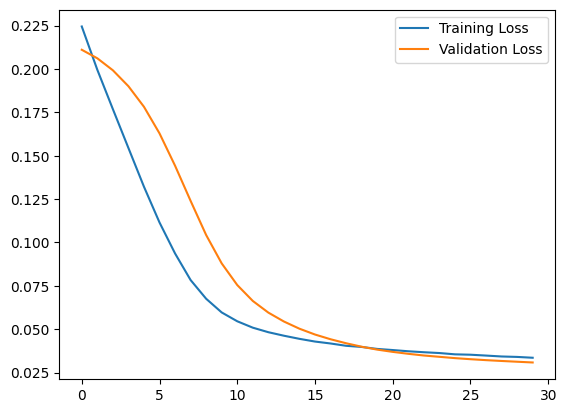

In [153]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

2023-03-07 22:36:07.466730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 38s 127ms/step


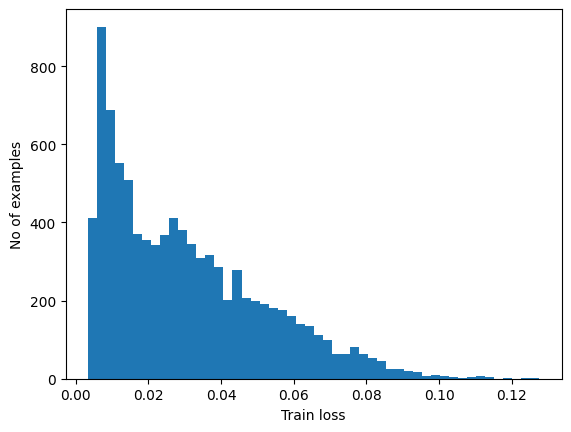

In [154]:
reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mse(reconstructions, X_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [155]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.05214687202362238


3/3 [==============================] - 2s 869ms/step


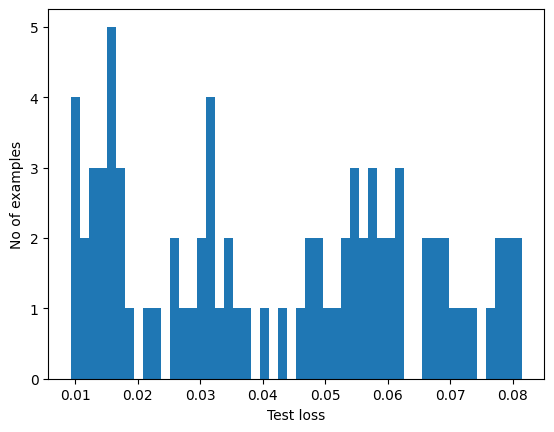

In [156]:
reconstructions = autoencoder.predict(X_test_y)
test_loss = tf.keras.losses.mse(reconstructions, X_test_y)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [157]:
def predict(model, data, threshold):
  reconstructions = model.predict(data)
  loss = tf.keras.losses.mse(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [158]:
preds = predict(autoencoder, X_vali, threshold)
print_stats(preds, Y_vali)

75/75 [==============================] - 11s 147ms/step
Accuracy = 0.18432026688907424
Precision = 0.0343955488113303
Recall = 0.591304347826087


In [159]:
df_val = autoencoder.predict(X_test)

53/53 [==============================] - 7s 123ms/step


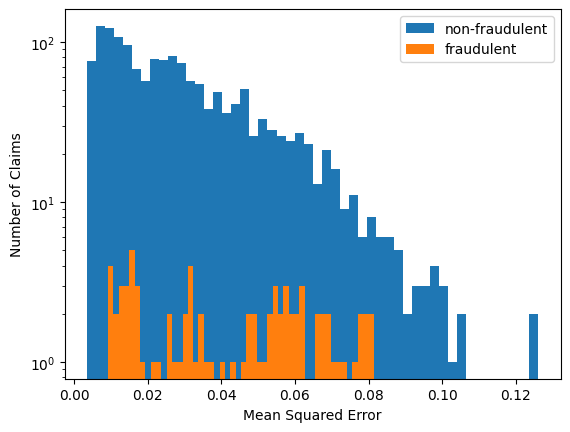

In [160]:
val_mse = np.mean(np.power(df_val - X_test, 2), axis=1)

# Separate the fraudulent and non-fraudulent claims in the validation set
fraud_mask = np.array(Y_test) == 1

# Plot the histogram of errors for the validation set
plt.hist(val_mse[~fraud_mask], bins=50, log=True,label='non-fraudulent')
plt.hist(val_mse[fraud_mask], bins=50, log=True, label='fraudulent')
plt.xlabel('Mean Squared Error')
plt.ylabel('Number of Claims')
plt.legend()

val_mse = val_mse.reset_index(drop=True)

# Mark the mean error for fraudulent and non-fraudulent claims
val_indices = np.arange(len(val_mse))